In [ ]:
Bidding Bot Detection_zzl


#### import package

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

#### import data

In [4]:
train_accounts = pd.read_csv('train_accounts.csv')
test_accounts = pd.read_csv('test_accounts.csv')
train_bids = pd.read_csv('train_bids.csv')
test_bids = pd.read_csv('test_bids.csv')

In [5]:
train_accounts.head()

,bidder_id,payment_account,address,outcome
0,ea5948061b2059bcbd900d3ae7e86e428ae8g,cee2b2bb0c91cac4cf7c3d0a7f6f0dddt2lku,a3d2de7675556553a5f08e4c88d2c228n7xkp,0.0
1,6ed7b95dcea7b359248e9efce91cbb11lm7hf,b99d8ade6b54244634c184837e71a0c2zb0xg,3df736ae35c2d07da1f522484c0e68c2yi8x1,0.0
2,b1bc9ff2b98df742affda07c5977c7345dpm5,8d6440f57adbd2563c102f4226c0e014b2wzs,dbc5678b0387bff64d5df269b116806cx8uh8,0.0
3,56cfe8b0d574e1df3f823c2cf32226eff52uw,a3d2de7675556553a5f08e4c88d2c2283qq7l,bc94c8f4b1df26180566a8b5612d868e7gpwg,0.0
4,3d94b376bae8dd60eea48ded36134a3962glw,a3d2de7675556553a5f08e4c88d2c228vswfg,a79c0f5caf9727c13b5f1b9df6fc072eg5j2y,0.0


In [7]:
test_accounts.head()

,bidder_id,payment_account,address
0,fb92fc925c5df50f4da7874a7542cf2210z1f,a3d2de7675556553a5f08e4c88d2c2285fa8i,a3d2de7675556553a5f08e4c88d2c228g8zew
1,d29003d7f3ec1f0e4ca9cc17e6389b4a4phcg,a0dc95936282ff8eef7ffa54f295255ctyafs,fa442b098896fe3f9aca16a6f100e597e5rky
2,12d6239a92972a35bc990225b3ab33466znm8,a3d2de7675556553a5f08e4c88d2c228vmub2,15377fd75760546b111f7cfc5d3b7ea3v9dfw
3,d0231e5200b870c055db7e3daae24bc8lt7at,b1b2ce3ff9eba49de46c2b1494944815xrdly,8237603cedb76af6dd5adb06a120deac3vous
4,1ae57d217b27820cabf6e24b721bfb38s6ja0,6dc76e92d02ce4f4af55f858987ce516zpjql,c2e2ffcffb384ca6ced38bbd9a5c5a62bh8wp


In [8]:
train_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9764304105263157,ae,205.207.249.115,uie67hmbvt2wil7
2,4800124,8c33cf751b05ca6a9d886a379a84a2ees9jlu,k3pcw,mobile,phone1681,9643643578947368,us,44.77.106.238,vasstdc27m7nks3
3,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3
4,1574124,d2704c8bb6ebbf13e08f37131382b126wy4yc,k0h6a,mobile,phone4,9768433263157894,in,57.163.90.101,vasstdc27m7nks3


In [9]:
test_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,1944758,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,lg9bk,office equipment,phone99,9770211736842105,th,59.246.142.163,dzd3lg4xy0irlvg
1,1925420,c670e7fb466b09000f1053d2761752268bkfm,aly3t,office equipment,phone143,9770015157894736,au,165.208.198.120,vasstdc27m7nks3
2,1365920,20ebb9de648c6df989f04d07cf273c7b3yu8c,jefix,mobile,phone224,9767292210526315,us,91.117.186.2,vasstdc27m7nks3
3,1924978,c670e7fb466b09000f1053d2761752268bkfm,k169w,office equipment,phone143,9770010947368421,au,165.208.198.120,vasstdc27m7nks3
4,1304018,20ebb9de648c6df989f04d07cf273c7b3yu8c,71nze,mobile,phone224,9766891789473684,us,91.117.186.2,vasstdc27m7nks3


### feature creation

#### 1. feature counts per biddder (account)

In [17]:
train_bids.groupby(['bidder_id'])['device'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k    34
01349288df20199905e719f0ff7ee771nwryj    28
01a39439e7afbdcfe385eedbddb23d76zgdrg    94
01c5692d487454cdbe731df330bef608f48zz    41
01eb9dcbd0b3e79d94020d13d83a993ec9d2a     3
Name: device, dtype: int64

In [18]:
train_bids.groupby(['bidder_id'])['ip'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k     55
01349288df20199905e719f0ff7ee771nwryj     49
01a39439e7afbdcfe385eedbddb23d76zgdrg    216
01c5692d487454cdbe731df330bef608f48zz     44
01eb9dcbd0b3e79d94020d13d83a993ec9d2a      3
Name: ip, dtype: int64

In [19]:
train_bids.groupby(['bidder_id'])['url'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k    29
01349288df20199905e719f0ff7ee771nwryj    23
01a39439e7afbdcfe385eedbddb23d76zgdrg    49
01c5692d487454cdbe731df330bef608f48zz    28
01eb9dcbd0b3e79d94020d13d83a993ec9d2a     2
Name: url, dtype: int64

In [20]:
train_bids.groupby(['bidder_id'])['merchandise'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k    1
01349288df20199905e719f0ff7ee771nwryj    1
01a39439e7afbdcfe385eedbddb23d76zgdrg    1
01c5692d487454cdbe731df330bef608f48zz    1
01eb9dcbd0b3e79d94020d13d83a993ec9d2a    1
Name: merchandise, dtype: int64

In [21]:
train_bids.groupby(['bidder_id'])['auction'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k     13
01349288df20199905e719f0ff7ee771nwryj     31
01a39439e7afbdcfe385eedbddb23d76zgdrg    131
01c5692d487454cdbe731df330bef608f48zz     19
01eb9dcbd0b3e79d94020d13d83a993ec9d2a      2
Name: auction, dtype: int64

In [22]:
train_bids.groupby(['bidder_id'])['country'].nunique().head()

bidder_id
01255c2c7c5578c186873422fc00fd7afwk8k     6
01349288df20199905e719f0ff7ee771nwryj     4
01a39439e7afbdcfe385eedbddb23d76zgdrg    26
01c5692d487454cdbe731df330bef608f48zz     5
01eb9dcbd0b3e79d94020d13d83a993ec9d2a     2
Name: country, dtype: int64

In [23]:
features = ['device','ip','url','merchandise','auction','country']
quant_feature_train = statByFeature(train_bids, features)
quant_feature_test = statByFeature(test_bids, features)

In [24]:
quant_feature_train.head()

,bidder_id,device,ip,url,merchandise,auction,country
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,1,13,6
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,1,31,4
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,1,131,26
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,1,19,5
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,1,2,2


In [25]:
quant_feature_test.head()

,bidder_id,device,ip,url,merchandise,auction,country
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,17,2,1,1,40,3
2,03244a553a252dcc3a3037f0371c8d33fmpd1,1,1,1,1,1,1
3,067ff22ebf0d33fe0deedc816d75973865jo7,7,17,1,1,22,5
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,4,5,1,1,9,5


#### 2.risk score per object

##### conbine train_bids and train_accouts

In [26]:
df_train = pd.merge(train_bids, train_accounts[['bidder_id','outcome']],on='bidder_id')

In [27]:
df_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.0
1,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3,0.0
2,5348147,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,aornh,office equipment,phone508,9695972789473684,tw,94.77.24.125,qnvyrbe2q64485d,0.0
3,6956888,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone35,9705076631578947,ke,150.72.18.78,0i79k658qw670j2,0.0
4,5539232,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,vceur,office equipment,phone229,9696822105263157,fr,246.147.189.47,8j97azbkxfm2axh,0.0


##### e.g. calculate risk score for  IN

In [28]:
df_train.groupby(['country'])['outcome'].sum()\
        .sort_values(ascending=False).head()

country
in    30127.0
th    13535.0
id     9507.0
us     8976.0
ru     8784.0
Name: outcome, dtype: float64

In [29]:
np.sum(df_train.country=='in')

95037

In [31]:
risk_score_for_in = 30127.0/95037
risk_score_for_in

0.31700285152098656

##### calculate risk score for all objects

In [32]:
def riskByFeature(data, ref, features):
    res = data
    for feature in features:
        bad = ref.groupby(feature)['outcome'].sum()
        count = ref.groupby(feature)['outcome'].count()
        temp = pd.DataFrame(bad/count).reset_index()
        temp.columns = [feature, str(feature+'_risk')]
        if feature == 'merchandise':
            infer = np.mean(temp[str(feature+'_risk')])
            temp = temp.append({'merchandise':'clothing', 'merchandise_risk':infer}, \
                               ignore_index=True)
            ## print temp
        res = pd.merge(res, temp, on=feature)
    return res

In [33]:
features = ['auction','device','merchandise','country','ip','url']
risk_summary = riskByFeature(df_train, df_train, features)

In [34]:
risk_summary.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9640271842105263,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9636084578947368,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9638806631578947,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9636085421052631,vn,213.234.5.30,vasstdc27m7nks3,0.0,0.061837,0.07569,0.072759,0.130938,0.244898,0.287907


##### display risk scores group by bidder id

In [35]:
derive_features = ['auction_risk','device_risk','merchandise_risk',\
                   'country_risk','ip_risk','url_risk']
quality_feature_train = pd.DataFrame(risk_summary.groupby('bidder_id')[derive_features].\
                                    mean()).reset_index()

In [36]:
quality_feature_train.head()

,bidder_id,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,01349288df20199905e719f0ff7ee771nwryj,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,01c5692d487454cdbe731df330bef608f48zz,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


##### repeat the same process on test dataset

In [37]:
df_test = pd.merge(test_bids, test_accounts[['bidder_id']],on='bidder_id')
risk_summary = riskByFeature(df_test, df_train, features)
quality_feature_test = pd.DataFrame(risk_summary.groupby('bidder_id')[derive_features].\
                                    mean()).reset_index()

In [38]:
quality_feature_test.head()

,bidder_id,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,001068c415025a009fee375a12cff4fcnht8y,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907
2,03244a553a252dcc3a3037f0371c8d33fmpd1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907
3,067ff22ebf0d33fe0deedc816d75973865jo7,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907


#### EDA- detect suscipious objects (with high risk scores)

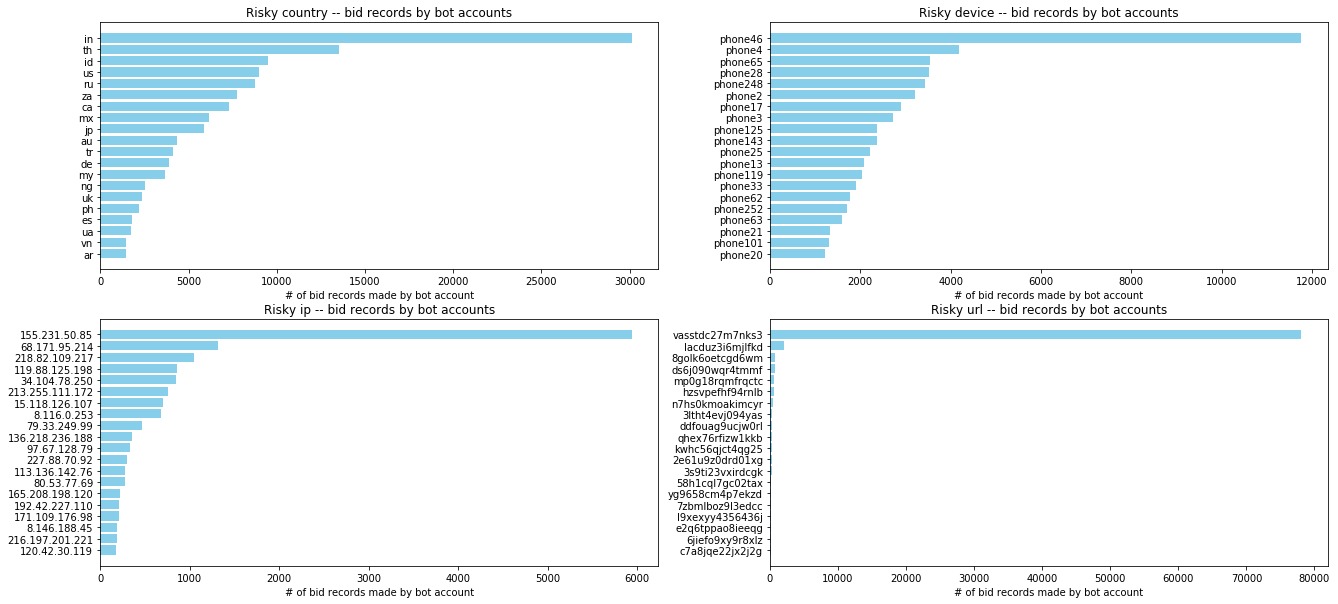

In [39]:
index = 0
plt.figure(figsize=(22,10))
features = ['country','device','ip','url']
for feature in features:
    index += 1
    plt.subplot(2,2, index)
    data = df_train.groupby([feature])['outcome'].sum()\
            .sort_values(ascending=False)
    data = data.reset_index()[0:20]
    importances = data['outcome']
    features_name = data[feature]
    indices = np.argsort(importances)
    plt.title('Risky '+ str(feature) + ' -- bid records by bot accounts')
    plt.barh(range(len(indices)), importances[indices], color='skyblue', align='center')
    plt.yticks(range(len(indices)), features_name[indices])
    plt.xlabel('# of bid records made by bot account')
plt.show()

#### model building

##### Logistic Regression

In [40]:
combined_feature = pd.merge(quant_feature_train, \
                           quality_feature_train, on = 'bidder_id')

In [41]:
combined_feature.head()

,bidder_id,device,ip,url,merchandise,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,1,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,1,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,1,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,1,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,1,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [42]:
combined_feature = combined_feature.drop(['merchandise'],axis=1)

In [43]:
combined_feature.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [44]:
dfLR_train = pd.merge(combined_feature, \
                     train_accounts, on = 'bidder_id')
dfLR_train.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk,payment_account,address,outcome
0,01255c2c7c5578c186873422fc00fd7afwk8k,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451,a3d2de7675556553a5f08e4c88d2c228ub9v1,f61893a13012022c0d7f875d2030805dagxm1,0.0
1,01349288df20199905e719f0ff7ee771nwryj,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389,a3d2de7675556553a5f08e4c88d2c228d99fp,f1cbc047730182fce18540c4915fb609uzqae,0.0
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563,f1620859bb80f8fe791bf5c3cddd0b54ezi86,c94cf5c3c5205afe0ef14ce669e015650as54,0.0
3,01c5692d487454cdbe731df330bef608f48zz,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509,240f40b4e3ce8f0d3bf8b7abdcf7e9d955tqa,58048808b920ee7ff05d34d2f817dae1vt41w,0.0
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938,a3d2de7675556553a5f08e4c88d2c228x4b9d,c76d416cc847dfcbc9755f743e15dc5a4ms5q,0.0


In [45]:
XLR_train = dfLR_train.drop(['bidder_id', 'payment_account', 'address',\
                            'outcome'], 1)
yLR_train = dfLR_train['outcome']

In [46]:
XLR_train.head()

,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,34,55,29,13,6,0.177427,0.208080,0.104167,0.274096,0.049307,0.128451
1,28,49,23,31,4,0.334319,0.177877,0.349435,0.302686,0.047691,0.123389
2,94,216,49,131,26,0.293888,0.177490,0.349435,0.278102,0.068128,0.160563
3,41,44,28,19,5,0.016842,0.166098,0.785528,0.034493,0.049764,0.161509
4,3,3,2,2,2,0.134906,0.155707,0.349435,0.277969,0.000000,0.191938


In [47]:
combined_feature = pd.merge(quant_feature_test, quality_feature_test, on='bidder_id')
combined_feature = combined_feature.drop(['merchandise'],axis=1)
dfLR_test = pd.merge(combined_feature, test_accounts, on='bidder_id')
XLR_test = dfLR_test.drop(['bidder_id','payment_account', 'address'], 1)
XLR_test.head()

,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk
0,1,1,1,1,1,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907
1,17,2,1,40,3,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907
2,1,1,1,1,1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907
3,7,17,1,22,5,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907
4,4,5,1,9,5,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907


### Naive Bays

In [48]:
train_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9764304105263157,ae,205.207.249.115,uie67hmbvt2wil7
2,4800124,8c33cf751b05ca6a9d886a379a84a2ees9jlu,k3pcw,mobile,phone1681,9643643578947368,us,44.77.106.238,vasstdc27m7nks3
3,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3
4,1574124,d2704c8bb6ebbf13e08f37131382b126wy4yc,k0h6a,mobile,phone4,9768433263157894,in,57.163.90.101,vasstdc27m7nks3


In [50]:
def riskScoreBayes(data, ref, features):
    risk = dict()
    for feature in features:
        risk_con = pd.DataFrame(ref.groupby([feature])['outcome'].sum()\
                                /np.sum(ref['outcome'])).reset_index()
        risk_con.columns = [feature, str(feature+'_risk')]
        p_xi_given_y_total = pd.DataFrame(ref.groupby([feature])['outcome'].count()\
                     /(len(ref)-np.sum(ref['outcome']))).reset_index()
        p_xi_given_y_bad = pd.DataFrame(ref.groupby([feature])['outcome'].sum()\
                     /(len(ref)-np.sum(ref['outcome']))).reset_index()
        normal_con = pd.merge(p_xi_given_y_total, p_xi_given_y_bad, on=feature)
        normal_con[str(feature+'_normal')] = normal_con['outcome_x']-normal_con['outcome_y']
        feature_risk = pd.merge(risk_con,normal_con,on=feature)
        feature_risk = feature_risk[[feature, str(feature+'_risk'),str(feature+'_normal')]]
        if feature == 'merchandise':
            infer_risk = np.mean(feature_risk[str(feature+'_risk')])
            infer_normal = np.mean(feature_risk[str(feature+'_normal')])
            feature_risk = feature_risk.append({'merchandise':'clothing', \
                                'merchandise_risk':infer_risk, \
                                'merchandise_normal':infer_normal}, ignore_index=True)
        risk[feature] = feature_risk
    res = data
    for feature in features:
        res = pd.merge(res, risk[feature], on=feature)
    return res

In [52]:
features = ['auction','device','country','merchandise','ip','url']
dfNB_train = riskScoreBayes(df_train, df_train, features)
dfNB_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome,...,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9640271842105263,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9636084578947368,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9638806631578947,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9636085421052631,vn,213.234.5.30,vasstdc27m7nks3,0.0,...,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162


In [54]:
dfNB_test = riskScoreBayes(df_test, df_train, features)

In [55]:
prior_1 = np.sum(dfNB_train.outcome)/len(dfNB_train)
prior_0 = 1-prior_1

In [57]:
'[prior_1, prior_0]: '+str([prior_1, prior_0])

'[prior_1, prior_0]: [0.2670443338374029, 0.7329556661625971]'

In [58]:
dfNB_test.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,auction_risk,...,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,1944758,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,lg9bk,office equipment,phone99,9770211736842105,th,59.246.142.163,dzd3lg4xy0irlvg,0.000080,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
1,1944802,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,cxozc,office equipment,phone99,9770212105263157,th,59.246.142.163,dzd3lg4xy0irlvg,0.000100,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
2,1944765,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,ijru6,office equipment,phone99,9770211789473684,th,59.246.142.163,dzd3lg4xy0irlvg,0.000060,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
3,1944748,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,psscd,office equipment,phone99,9770211684210526,th,59.246.142.163,dzd3lg4xy0irlvg,0.000053,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
4,1944778,5f529b5ee68b60482c5d0c56ee91f3c2cjrmx,fbp7d,office equipment,phone99,9770211894736842,th,59.246.142.163,dzd3lg4xy0irlvg,0.000053,...,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0


In [59]:
XNB_train = dfNB_train[['auction_risk','auction_normal',\
                        'device_risk', 'device_normal',\
                        'country_risk', 'country_normal',\
                        'merchandise_risk','merchandise_normal',\
                        'ip_risk', 'ip_normal',\
                        'url_risk', 'url_normal']]
yNB_train_bid_level = dfNB_train[['outcome']]
XNB_train.head()

,auction_risk,auction_normal,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
1,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
2,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
3,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162
4,0.000466,0.002575,0.027861,0.123962,0.009702,0.023461,0.029525,0.137088,0.00008,0.00009,0.519524,0.468162


In [60]:
XNB_test = dfNB_test[['auction_risk','auction_normal',\
                     'device_risk', 'device_normal',\
                     'country_risk', 'country_normal',\
                      'merchandise_risk','merchandise_normal',\
                     'ip_risk', 'ip_normal',\
                     'url_risk', 'url_normal']]
XNB_test.head()

,auction_risk,auction_normal,device_risk,device_normal,country_risk,country_normal,merchandise_risk,merchandise_normal,ip_risk,ip_normal,url_risk,url_normal
0,0.000080,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
1,0.000100,0.000264,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
2,0.000060,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
3,0.000053,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0
4,0.000053,0.000000,0.002642,0.006105,0.090065,0.026584,0.029525,0.137088,0.000033,0.0,0.00004,0.0


#### make prediction

##### logistic regression

In [61]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'lbfgs')
LR.fit(XLR_train, yLR_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
yLR_train_pred = LR.predict_proba(XLR_train) 
yLR_test_pred = LR.predict_proba(XLR_test) 

In [64]:
dfLR_test.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk,payment_account,address
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,17,2,1,40,3,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di
2,03244a553a252dcc3a3037f0371c8d33fmpd1,1,1,1,1,1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907,a3d2de7675556553a5f08e4c88d2c22886sbt,1df0b2cb82cd98e90972acc8e8a752detwki0
3,067ff22ebf0d33fe0deedc816d75973865jo7,7,17,1,22,5,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907,a3d2de7675556553a5f08e4c88d2c22848lqa,022b06519985716abd9fc8ce83540d58wsgo1
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,4,5,1,9,5,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907,a3d2de7675556553a5f08e4c88d2c228aiumg,a3d2de7675556553a5f08e4c88d2c228y7jgq


In [65]:
dfLR_test['p_risk'] = yLR_test_pred[:,1]

In [66]:
dfLR_test.head()

,bidder_id,device,ip,url,auction,country,auction_risk,device_risk,merchandise_risk,country_risk,ip_risk,url_risk,payment_account,address,p_risk
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,0.088710,0.017544,0.104167,0.060694,0.060000,0.287907,a3d2de7675556553a5f08e4c88d2c228iiasc,a3d2de7675556553a5f08e4c88d2c2282aj35,0.140388
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,17,2,1,40,3,0.159152,0.486288,0.240360,0.281261,0.942081,0.287907,57aec2c76d2db80cf61c2543d15ef9f82tplj,c57c64adcc43ce50d99f184d87981d87yz2di,0.657237
2,03244a553a252dcc3a3037f0371c8d33fmpd1,1,1,1,1,1,0.000000,0.159439,0.104167,0.317003,1.000000,0.287907,a3d2de7675556553a5f08e4c88d2c22886sbt,1df0b2cb82cd98e90972acc8e8a752detwki0,0.654948
3,067ff22ebf0d33fe0deedc816d75973865jo7,7,17,1,22,5,0.121279,0.111982,0.303857,0.255374,0.501711,0.287907,a3d2de7675556553a5f08e4c88d2c22848lqa,022b06519985716abd9fc8ce83540d58wsgo1,0.280243
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,4,5,1,9,5,0.382435,0.284171,0.303857,0.364492,0.351144,0.287907,a3d2de7675556553a5f08e4c88d2c228aiumg,a3d2de7675556553a5f08e4c88d2c228y7jgq,0.222989


In [67]:
test_accounts.head()

,bidder_id,payment_account,address
0,fb92fc925c5df50f4da7874a7542cf2210z1f,a3d2de7675556553a5f08e4c88d2c2285fa8i,a3d2de7675556553a5f08e4c88d2c228g8zew
1,d29003d7f3ec1f0e4ca9cc17e6389b4a4phcg,a0dc95936282ff8eef7ffa54f295255ctyafs,fa442b098896fe3f9aca16a6f100e597e5rky
2,12d6239a92972a35bc990225b3ab33466znm8,a3d2de7675556553a5f08e4c88d2c228vmub2,15377fd75760546b111f7cfc5d3b7ea3v9dfw
3,d0231e5200b870c055db7e3daae24bc8lt7at,b1b2ce3ff9eba49de46c2b1494944815xrdly,8237603cedb76af6dd5adb06a120deac3vous
4,1ae57d217b27820cabf6e24b721bfb38s6ja0,6dc76e92d02ce4f4af55f858987ce516zpjql,c2e2ffcffb384ca6ced38bbd9a5c5a62bh8wp


In [69]:
yLR_test_pred = np.array(pd.merge(test_accounts, dfLR_test, on='bidder_id')['p_risk'])

#### Naive bays

In [71]:
def bayesPred(data, features, prior):
    p_normal = pd.Series(prior[0]*np.ones(len(data)))
    p_risk = pd.Series(prior[1]*np.ones(len(data)))
    for feature in features:
        p_normal=p_normal*data[str(feature)+'_normal']
        p_risk=p_risk*data[str(feature)+'_risk']
    return p_normal, p_risk

In [72]:
features = ['auction','device','merchandise','country','ip','url']
prior = [prior_0, prior_1]

In [73]:
p_normal, p_risk = bayesPred(XNB_train, features, prior)
dfNB_train['p_normal'] = p_normal/(p_normal+p_risk)
dfNB_train['p_risk'] = p_risk/(p_normal+p_risk)
dfNB_train_bayes = dfNB_train[['bid_id','bidder_id','p_normal','p_risk']]

In [74]:
df_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,outcome
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.0
1,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3,0.0
2,5348147,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,aornh,office equipment,phone508,9695972789473684,tw,94.77.24.125,qnvyrbe2q64485d,0.0
3,6956888,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone35,9705076631578947,ke,150.72.18.78,0i79k658qw670j2,0.0
4,5539232,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,vceur,office equipment,phone229,9696822105263157,fr,246.147.189.47,8j97azbkxfm2axh,0.0


In [75]:
dfNB_train_bayes.head()

,bid_id,bidder_id,p_normal,p_risk
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
1,4017870,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
2,3193115,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
3,3772904,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302
4,3193277,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,0.998698,0.001302


In [76]:
nb_summary_train = pd.merge(train_bids, dfNB_train_bayes, on=['bid_id','bidder_id'])
nb_summary_train.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,p_normal,p_risk
0,4701043,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,z6se8,office equipment,phone4,9642929789473684,vn,213.234.5.30,vasstdc27m7nks3,0.998698,0.001302
1,937200,ea5948061b2059bcbd900d3ae7e86e428ae8g,g4cv3,mobile,phone53,9764304105263157,ae,205.207.249.115,uie67hmbvt2wil7,1.000000,0.000000
2,4800124,8c33cf751b05ca6a9d886a379a84a2ees9jlu,k3pcw,mobile,phone1681,9643643578947368,us,44.77.106.238,vasstdc27m7nks3,0.000000,1.000000
3,5315682,ae45f9b94d86f931c84c94f3975e3d7bkv2r0,i506w,office equipment,phone4,9695865105263157,ke,24.111.180.137,vasstdc27m7nks3,1.000000,0.000000
4,1574124,d2704c8bb6ebbf13e08f37131382b126wy4yc,k0h6a,mobile,phone4,9768433263157894,in,57.163.90.101,vasstdc27m7nks3,0.000000,1.000000


In [77]:
NBS_train = nb_summary_train.groupby('bidder_id')['p_risk'].quantile(.5).reset_index()
yNB_train_pred = NBS_train['p_risk']
NBS_train.head()

,bidder_id,p_risk
0,01255c2c7c5578c186873422fc00fd7afwk8k,0.0
1,01349288df20199905e719f0ff7ee771nwryj,0.0
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,0.0
3,01c5692d487454cdbe731df330bef608f48zz,0.0
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,0.0


In [79]:
NBS_train = pd.merge(NBS_train, train_accounts, on='bidder_id')\
    .drop(['payment_account','address'],axis=1)
NBS_train.head()

,bidder_id,p_risk,outcome_x,outcome_y
0,01255c2c7c5578c186873422fc00fd7afwk8k,0.0,0.0,0.0
1,01349288df20199905e719f0ff7ee771nwryj,0.0,0.0,0.0
2,01a39439e7afbdcfe385eedbddb23d76zgdrg,0.0,0.0,0.0
3,01c5692d487454cdbe731df330bef608f48zz,0.0,0.0,0.0
4,01eb9dcbd0b3e79d94020d13d83a993ec9d2a,0.0,0.0,0.0


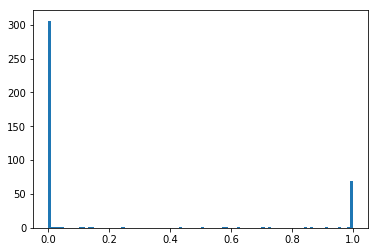

In [80]:
plt.hist(NBS_train['p_risk'], bins=100)
plt.show()

In [81]:
p_normal, p_risk = bayesPred(XNB_test, features, prior)
dfNB_test['p_normal'] = p_normal/(p_normal+p_risk)
dfNB_test['p_risk'] = p_risk/(p_normal+p_risk)
dfNB_test_bayes = dfNB_test[['bid_id','bidder_id','p_normal','p_risk']]
nb_summary_test = pd.merge(test_bids, dfNB_test_bayes, on=['bid_id','bidder_id'])
NBS_test = nb_summary_test.groupby('bidder_id')['p_risk'].quantile(.5).reset_index()
yNB_test_pred = NBS_test['p_risk']

In [82]:
NBS_test = NBS_test.fillna(0)
NBS_test.head()

,bidder_id,p_risk
0,001068c415025a009fee375a12cff4fcnht8y,0.000052
1,022ac3a7ce986049d9a4bede83ccf9ddctvg6,0.839159
2,03244a553a252dcc3a3037f0371c8d33fmpd1,0.000000
3,067ff22ebf0d33fe0deedc816d75973865jo7,0.066606
4,09d71d3e6a6871a7598dc2764c5bb4ffkz6mc,0.566549


In [83]:
yNB_test_pred = np.array(pd.merge(test_accounts, NBS_test, on='bidder_id')['p_risk'])

In [84]:
yNB_test_pred

array([8.43281962e-01, 3.33447509e-02, 1.56941317e-02, 8.45596279e-04,
       0.00000000e+00, 0.00000000e+00, 4.05110636e-01, 6.46971371e-03,
       0.00000000e+00, 1.98855596e-01, 4.18113117e-01, 9.78273138e-03,
       0.00000000e+00, 5.24993421e-05, 9.01826574e-01, 0.00000000e+00,
       8.50487355e-03, 0.00000000e+00, 8.52190924e-04, 8.39159054e-01,
       4.20902901e-02, 0.00000000e+00, 5.66549415e-01, 7.64382472e-03,
       0.00000000e+00, 2.92728263e-04, 9.05395852e-02, 3.40077903e-04,
       1.33473805e-02, 9.53436300e-02, 2.23555246e-01, 0.00000000e+00,
       0.00000000e+00, 1.88502232e-03, 1.96155448e-02, 3.99251272e-02,
       1.00000000e+00, 2.90278409e-02, 0.00000000e+00, 3.97014488e-05,
       3.95578062e-02, 0.00000000e+00, 0.00000000e+00, 3.97431526e-02,
       9.22667277e-03, 0.00000000e+00, 1.19511452e-01, 1.00000000e+00,
       4.28457462e-02, 1.25397708e-01, 0.00000000e+00, 2.06746537e-06,
       3.87091323e-02, 0.00000000e+00, 2.25841881e-02, 9.97984678e-01,
      

### Model Evaluation

In [88]:
len(test_accounts)

143

In [87]:
y_test_ground = np.array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,\
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,\
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,\
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,\
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,\
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
y_test_ground

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

#### Log loss

In [90]:
from sklearn.metrics import log_loss
log_loss(y_test_ground, yLR_test_pred)

0.41534651049439386

In [91]:
log_loss(y_test_ground, yNB_test_pred)

1.6907952417100875

#### ROC curve

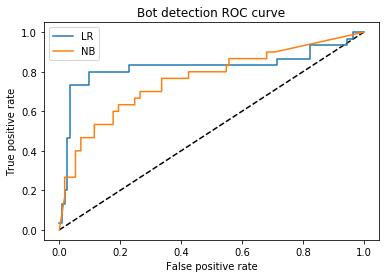

'auc LR -- 0.82, auc NB -- 0.76'

In [92]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_lr, tpr_lr, _ = roc_curve(y_test_ground, yLR_test_pred)
fpr_nb, tpr_nb, _ = roc_curve(y_test_ground, yNB_test_pred)
auc_lr = roc_auc_score(y_test_ground, yLR_test_pred)
auc_nb = roc_auc_score(y_test_ground, yNB_test_pred)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_nb, tpr_nb, label='NB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Bot detection ROC curve')
plt.legend(loc='best')
plt.show()
'auc LR -- {0:0.2f}'.format(auc_lr) + ', auc NB -- {0:0.2f}'.format(auc_nb)